# PROJETO ENADE - INEP 

## DICIONÁRIO DE DADOS 

**CO_CATEGAD	Código da categoria administrativa da IES**	


1 = Pública Federal

2 = Pública Estadual

3 = Pública Municipal

4 = Privada com fins lucrativos

5 = Privada sem fins lucrativos

7 = Especial

**area_curso - Código da área de enquadramento do curso no Enade**
&CO_GRUPO==1401&

"21 = Arquitetura e Urbanismo

72 = Tecnologia em Análiseise e Desenvolvimento de Sistemas

76 = Tecnologia em Gestão da Produçãoo Industrial

79 = Tecnologia em Redes de Computadores

701 = Matemática (Bacharelado)

702 = Matemática (Licenciatura)

903 = Letras-Portuguesa (Bacharelado)

904 = Letras-Portuguesa (Licenciatura)

905 = Letras-Portuguesa e Inglês (Licenciatura)

906 = Letras-Portuguesa e Espanhol (Licenciatura)

1401 = Física (Bacharelado)

1402 = Física (Licenciatura)

1501 = Química (Bacharelado)

1502 = Química (Licenciatura)

1601 = Ciências Biológicas (Bacharelado)

1602 = Ciências Biológicas (Licenciatura)

2001 = Pedagogia (Licenciatura)

2401 = História (Bacharelado)

2402 = História (Licenciatura)

2501 = Artes Visuais (Licenciatura)

3001 = Geografia (Bacharelado)

3002 = Geografia (Licenciatura)

3201 = Filosofia (Bacharelado)

3202 = Filosofia (Licenciatura)

3502 = Educaçãoo Física (Licenciatura)


**CO_REGIAO_CURSO	Código da região de funcionamento do curso**

1 = Norte

2 = Nordeste

3 = Sudeste

4 = Sul

5 = Centro-Oeste

**NU_IDADE	Idade do inscrito em 26/11/2017**

Min = 10 

Max = 95

**TP_SEXO	Tipo de sexo**

M = Masculino

F = Feminino  


**CO_TURNO_GRADUACAO	Código do turno de graduação**	

1 = Matutino

2 = Vespertino

3 = Integral

4 = Noturno

**NT_GER	Nota bruta da prova - Media ponderada da formação geral (25%) e componente específico (75%).** 

(valor de 0 a 100)	

**QE_I01	Qual o seu estado civil?**	

A = Solteiro(a).

B = Casado(a).

C = Separado(a) judicialmente/divorciado(a).

D = Viúvo(a).

E = Outro.

**QE_I02	Qual a sua cor ou raça?**	

A = Branca.

B = Preta.

C = Amarela.

D = Parda.

E = Indígena.

F = Não quero declarar.

**QE_I08 - Qual a renda total de sua família, incluindo seus rendimentos?**	

A = Até 1,5 salários mínimo (atÃ© R$ 1.405,50).

B = De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).

C = De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).

D = De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).

E = De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).

F = De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).

G = Acima de 30 salários mínimos (mais de R$ 28.110,00).

**QE_I21	Alguém em sua família concluiu um curso superior?**

A = Sim.

B = Não.

**QE_I23 Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?**

A = Nenhuma, apenas assisto as aulas.

B = De uma a três.

C = De quatro a sete.

D = De oito a doze.

E = Mais de doze.

## BIBLIOTECAS

In [1]:
#conda install -c conda-forge dash

In [2]:
import dash
import math

import pandas as pd
import numpy as np
import seaborn as sns

import plotly.offline as py
import plotly.express as px

import plotly.graph_objs as go
import matplotlib.pyplot as plt

import dash_core_components as dcc
import plotly.figure_factory as ff
import dash_html_components as html

from plotly.subplots import make_subplots
from scipy.stats import iqr,variation,mode

import warnings
warnings.filterwarnings('ignore')

## DATASET

In [3]:
microdados_enade = pd.read_csv('/Users/daianeklein/Documents/Cursos/Projeto-INEP/Projeto Enade - INEP - Análise Descritiva e Manipulação com Dplyr/MICRODADOS_ENADE_2017.txt',
                sep = ';', decimal = ",")

microdados_enade 
        
        

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537431,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537432,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537433,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537434,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Tamanho do arquivo
microdados_enade.shape

(537436, 150)

In [5]:
# Selecionando colunas
colunas = ['CO_GRUPO','CO_REGIAO_CURSO','NU_IDADE','TP_SEXO','CO_TURNO_GRADUACAO','NT_GER','QE_I01','QE_I02',
           'QE_I08','QE_I21','QE_I23','NT_OBJ_FG', 'NT_OBJ_CE']

# Filtrando dataset
microdados_enade = microdados_enade[colunas]

# Visualizando dataframe
microdados_enade

,CO_GRUPO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,NT_GER,QE_I01,QE_I02,QE_I08,QE_I21,QE_I23,NT_OBJ_FG,NT_OBJ_CE
0,5710,5,26,F,3.0,52.6,A,A,B,A,D,87.5,52.6
1,5710,5,23,F,3.0,63.1,B,D,B,A,C,87.5,63.2
2,5710,5,23,M,3.0,33.7,A,D,F,A,B,87.5,26.3
3,5710,5,23,M,3.0,58.1,A,A,B,A,C,75.0,57.9
4,5710,5,24,M,3.0,46.3,A,A,F,A,B,75.0,36.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537431,6208,3,26,M,4.0,NaN,A,D,C,B,B,NaN,NaN
537432,6208,3,41,M,4.0,NaN,B,A,B,A,D,NaN,NaN
537433,6208,3,22,M,4.0,NaN,A,D,B,B,B,NaN,NaN
537434,6208,3,35,F,4.0,NaN,B,D,C,A,C,NaN,NaN


In [6]:
# colunas 
microdados_enade.columns

Index(['CO_GRUPO', 'CO_REGIAO_CURSO', 'NU_IDADE', 'TP_SEXO',
       'CO_TURNO_GRADUACAO', 'NT_GER', 'QE_I01', 'QE_I02', 'QE_I08', 'QE_I21',
       'QE_I23', 'NT_OBJ_FG', 'NT_OBJ_CE'],
      dtype='object')

In [7]:
# Selecionando somente o curso Analise e desenvolvimento de sistemas
microdados_enade = microdados_enade[microdados_enade['CO_GRUPO'] == 72]
microdados_enade.head()

,CO_GRUPO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,NT_GER,QE_I01,QE_I02,QE_I08,QE_I21,QE_I23,NT_OBJ_FG,NT_OBJ_CE
31583,72,3,21,F,1.0,21.7,A,D,A,B,C,25.0,15.0
31584,72,3,24,F,1.0,29.7,A,B,C,A,B,62.5,20.0
31585,72,3,30,M,4.0,35.3,D,D,A,B,D,37.5,35.0
31586,72,3,23,M,1.0,13.1,A,D,F,B,C,25.0,10.0
31587,72,3,20,M,1.0,27.5,A,A,B,A,B,37.5,20.0


In [8]:
# Tamanho do arquivo
microdados_enade.shape

(12538, 13)

In [9]:
# Colunas
microdados_enade.columns

Index(['CO_GRUPO', 'CO_REGIAO_CURSO', 'NU_IDADE', 'TP_SEXO',
       'CO_TURNO_GRADUACAO', 'NT_GER', 'QE_I01', 'QE_I02', 'QE_I08', 'QE_I21',
       'QE_I23', 'NT_OBJ_FG', 'NT_OBJ_CE'],
      dtype='object')

In [10]:
# Selecionando as coluna que queremos visualizar
cols = ['QE_I01', 'CO_REGIAO_CURSO', 'TP_SEXO', 'QE_I23']

# Atribuindo a qt. de valores na variavel table
table = microdados_enade[cols].apply(pd.Series.value_counts)

# Alterando o tipo de dado para object e os valores nuloes (nan) para a palavra 'None'
table = table.astype(object).replace(np.nan, 'None')

# Substituindo a palavra 'None' para vazio (a fim de facilitar a visualização)
table = table.replace('None', '')

table

,QE_I01,CO_REGIAO_CURSO,TP_SEXO,QE_I23
1,,389,,
2,,1117,,
3,,7538,,
4,,2583,,
5,,911,,
A,7827,,,876
B,2087,,,4496
C,207,,,2908
D,11,,,1119
E,327,,,1060


In [11]:
# Verificando dados nulos
microdados_enade[cols].isna().sum()

QE_I01             2079
CO_REGIAO_CURSO       0
TP_SEXO               0
QE_I23             2079
dtype: int64

In [12]:
#dicionario - "Traduzindo" o nome das variáveis

# Criando os dicionarios

#QE_I01
estado_civil = {'A' : 'Solteiro(a)',
                'B' : 'Casado(a)',
                'C' : 'Separado(a)',
                'D' : 'Viúvo(a)',
                'E' : 'Outro'}
    
#CO_REGIAO_CURSO
regiao = {1 : 'Norte',
         2 : 'Nordeste',
         3 : 'Sudeste',
         4 : 'Sul',
         5 : 'Centro-Oeste'}
    
#TP_SEXO
sexo = {'M' : 'Masculino',
       'F' : 'Feminino'}    


#QE_I23
horas_estudo = {'A' : 'Nenhuma, apenas assisto às aulas',
               'B' : 'De uma a três',
               'C' : 'De quatro a sete',
               'D' : 'De oito a doze',
               'E' : 'Mais de doze'}


In [13]:
# substituindo os campos
microdados_enade['QE_I01'] = microdados_enade['QE_I01'].map(estado_civil)
microdados_enade['CO_REGIAO_CURSO'] = microdados_enade['CO_REGIAO_CURSO'].map(regiao)
microdados_enade['TP_SEXO'] = microdados_enade['TP_SEXO'].map(sexo)
microdados_enade['QE_I23'] = microdados_enade['QE_I23'].map(horas_estudo)

#Visualizando a tabela
microdados_enade[cols]

,QE_I01,CO_REGIAO_CURSO,TP_SEXO,QE_I23
31583,Solteiro(a),Sudeste,Feminino,De quatro a sete
31584,Solteiro(a),Sudeste,Feminino,De uma a três
31585,Viúvo(a),Sudeste,Masculino,De oito a doze
31586,Solteiro(a),Sudeste,Masculino,De quatro a sete
31587,Solteiro(a),Sudeste,Masculino,De uma a três
...,...,...,...,...
537276,NaN,Nordeste,Masculino,NaN
537277,NaN,Nordeste,Feminino,NaN
537278,NaN,Sudeste,Masculino,NaN
537279,Casado(a),Sudeste,Masculino,De uma a três


## ESTATISTICA DESCRITIVA

In [14]:
# tipos de dados
microdados_enade.dtypes

CO_GRUPO                int64
CO_REGIAO_CURSO        object
NU_IDADE                int64
TP_SEXO                object
CO_TURNO_GRADUACAO    float64
NT_GER                float64
QE_I01                 object
QE_I02                 object
QE_I08                 object
QE_I21                 object
QE_I23                 object
NT_OBJ_FG             float64
NT_OBJ_CE             float64
dtype: object

In [15]:
# Selecionando as variaveis categoricas e numericas
num = microdados_enade.select_dtypes(include= ['int64', 'float64'])
cat = microdados_enade.select_dtypes(exclude= ['int64', 'float64'])

### TABELA DE FREQUENCIA

In [16]:
# tamanho da amostra
tamanho = len(microdados_enade['NU_IDADE'])

k = int((1 + ((10/3) * np.log10(tamanho))))
k # quantidade de classes que os dados serão divididos

14

In [17]:
# Criando a coluna com as classes
microdados_enade['classe_idade'] = pd.cut( x = microdados_enade['NU_IDADE'], bins = k, include_lowest= True)

# Criando a tabela de frequencia
frequencia = microdados_enade['classe_idade'].value_counts()
percentual = microdados_enade['classe_idade'].value_counts( normalize = True) * 1000

# Criando o dataframe
dist_freq = pd.DataFrame({'Frequencia' : frequencia,
                         'Percentual' : percentual})

dist_freq

,Frequencia,Percentual
"(21.929, 25.857]",3911,311.931728
"(25.857, 29.786]",2518,200.829478
"(17.944, 21.929]",2316,184.718456
"(29.786, 33.714]",1587,126.575211
"(33.714, 37.643]",1048,83.585899
"(37.643, 41.571]",526,41.952465
"(41.571, 45.5]",294,23.448716
"(45.5, 49.429]",166,13.239751
"(49.429, 53.357]",92,7.337693
"(53.357, 57.286]",54,4.306907


### TIPOS DE FREQUENCIA

#### FREQUENCIA SIMPLES  - CONTAGEM SIMPLES DE ELEMENTOS

In [18]:
freq_simples = pd.DataFrame(microdados_enade['NU_IDADE'].value_counts().reset_index()).sort_values(by='index')

# renomeando as colunas
freq_simples.rename(columns={'index' : 'idade',
                             'NU_IDADE' : 'freq_simples'}, inplace = True)

freq_simples = freq_simples.sort_values(by='idade')

freq_simples

,idade,freq_simples
37,18,14
17,19,237
4,20,916
1,21,1149
0,22,1165
2,23,1036
3,24,916
5,25,794
6,26,725
7,27,650


#### FREQUENCIA SIMPLES  ACUMULADA - CONTAGEM ACUMULADA ATÉ A CLASSE DE INTERESSE (INCLUSIVE)

In [19]:
freq_simples_acumulada = pd.DataFrame(microdados_enade['NU_IDADE'].value_counts()).sort_index()

# Calculando a frequencia simples acumulada
freq_simples_acumulada = np.cumsum(freq_simples_acumulada).reset_index() 

# renomeando as colunas
freq_simples_acumulada.rename(columns={'index' : 'idade',
                                      'NU_IDADE' : 'freq_simples_acumulada'}, inplace = True)


freq_simples_acumulada =freq_simples_acumulada.sort_values(by='idade')
freq_simples_acumulada


,idade,freq_simples_acumulada
0,18,14
1,19,251
2,20,1167
3,21,2316
4,22,3481
5,23,4517
6,24,5433
7,25,6227
8,26,6952
9,27,7602


#### FREQUENCIA RELATIVA SIMPLES - CONTAGEM SIMPLES DOS ELEMENTOS, DIVIDIDOS PELA SOMA DAS FREQUENCIAS SIMPLES

In [20]:
freq_relativa_simples = pd.DataFrame(microdados_enade['NU_IDADE'].value_counts(normalize = True) * 100).reset_index().sort_values(by='index')

# renomeando as colunas
freq_relativa_simples.rename(columns={'index' : 'idade',
                                      'NU_IDADE' : 'freq_relativa_simples'}, inplace = True)

freq_relativa_simples

,idade,freq_relativa_simples
37,18,0.111661
17,19,1.890254
4,20,7.305790
1,21,9.164141
0,22,9.291753
2,23,8.262881
3,24,7.305790
5,25,6.332748
6,26,5.782421
7,27,5.184240


#### FREQUENCIA RELATIVA  ACUMULADA - CONTAGEM ACUMULADA ATÉ A CLASSE DE INTERESSE, DIVIDIDO PELA SOMA DAS FREQUENCIAS SIMPLES

In [21]:

# calculando a frequencia relativa 
freq_relativa_acumulada = pd.DataFrame(microdados_enade['NU_IDADE'].value_counts(normalize = True) * 100).sort_index()

#Calculando a frequencia relativa acumulada
freq_relativa_acumulada = np.cumsum(freq_relativa_acumulada).reset_index()

# renomeando as colunas

freq_relativa_acumulada.rename(columns={'index' : 'idade',
                                        'NU_IDADE' : 'freq_relativa_acumulada'}, inplace = True)

freq_relativa_acumulada

,idade,freq_relativa_acumulada
0,18,0.111661
1,19,2.001914
2,20,9.307705
3,21,18.471846
4,22,27.763599
5,23,36.026480
6,24,43.332270
7,25,49.665018
8,26,55.447440
9,27,60.631680


In [22]:
tabela_frequencias = freq_simples.merge(freq_simples_acumulada, 
                   on ='idade', 
                   how = 'inner').merge(freq_relativa_simples, 
                                        on ='idade',
                                       how = 'inner').merge(freq_relativa_acumulada,
                                                            on ='idade',
                                                           how = 'inner')
tabela_frequencias                                                                   

,idade,freq_simples,freq_simples_acumulada,freq_relativa_simples,freq_relativa_acumulada
0,18,14,14,0.111661,0.111661
1,19,237,251,1.890254,2.001914
2,20,916,1167,7.305790,9.307705
3,21,1149,2316,9.164141,18.471846
4,22,1165,3481,9.291753,27.763599
5,23,1036,4517,8.262881,36.026480
6,24,916,5433,7.305790,43.332270
7,25,794,6227,6.332748,49.665018
8,26,725,6952,5.782421,55.447440
9,27,650,7602,5.184240,60.631680


### MÉDIA, MEDIANA E MODA

In [23]:
print('Média: {}'.format(microdados_enade['NU_IDADE'].mean()))
print('Mediana: {}'.format(microdados_enade['NU_IDADE'].median()))
print('Moda: {}'.format(microdados_enade['NU_IDADE'].mode()[0]))

Média: 27.50295102887223
Mediana: 26.0
Moda: 22


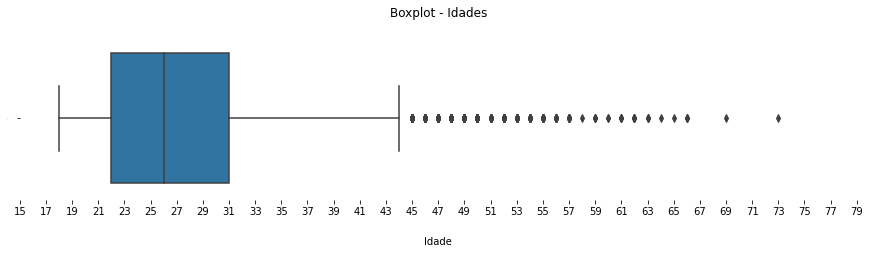

In [24]:
#boxplot

plt.figure(figsize=(15, 3))

sns.boxplot(microdados_enade['NU_IDADE'])
sns.despine(bottom=True, left=True)
plt.title('Boxplot - Idades', pad = 20)
plt.xlabel('Idade', labelpad=20)
plt.ylabel([],fontsize=0)
plt.legend([],[], frameon=False)

# Configurando o eixo x
x_ticks = np.arange(15, 80, 2)
plt.xticks(x_ticks);

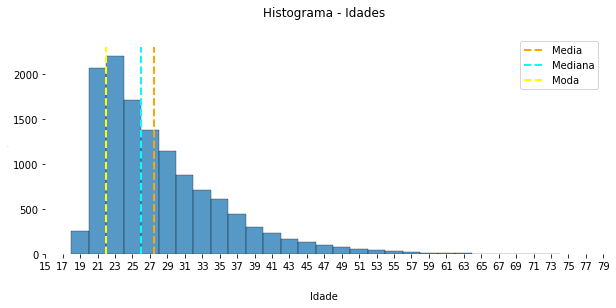

In [25]:
# Histograma

plt.figure(figsize=(10, 4))
sns.histplot(data = microdados_enade, x = 'NU_IDADE', binwidth=2, linewidth = 0.3, palette = 'mako')

sns.despine(bottom=True, left=True)
plt.title('Histograma - Idades', pad = 20)
plt.xlabel('Idade', labelpad=20)
plt.ylabel([],fontsize=0)
plt.legend([],[], frameon=False)


# Inserindo linhas verticais com a média, mediana e moda
plt.vlines(x=microdados_enade['NU_IDADE'].mean(),
          linewidth = 2, color = 'orange',
           ymin = 0,
           ymax = 2300,
          label = 'Media',
          linestyle = '--')

plt.vlines(x=microdados_enade['NU_IDADE'].median(),
          linewidth = 2, color = 'cyan',
           ymin = 0,
           ymax = 2300,
          label = 'Mediana',
          linestyle = '--')

plt.vlines(x=microdados_enade['NU_IDADE'].mode(),
          linewidth = 2, color = 'yellow',
           ymin = 0,
           ymax = 2300,
          label = 'Moda',
          linestyle = '--')

# Configurando o eixo x
x_ticks = np.arange(15, 80, 2)
plt.xticks(x_ticks)

plt.legend();

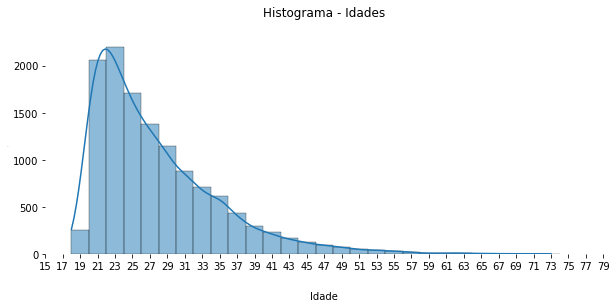

In [26]:
# Histograma com kde

plt.figure(figsize=(10, 4))
sns.histplot(data = microdados_enade, x = 'NU_IDADE', binwidth=2, linewidth = 0.3, palette = 'mako', kde = True)

sns.despine(bottom=True, left=True)
plt.title('Histograma - Idades', pad = 20)
plt.xlabel('Idade', labelpad=20)
plt.ylabel([],fontsize=0)
plt.legend([],[], frameon=False)

# Configurando o eixo x
x_ticks = np.arange(15, 80, 2)
plt.xticks(x_ticks);

#### ASSIMETRIA E KURTOSIs

In [27]:
# skew
microdados_enade['NU_IDADE'].skew()

1.4490661563636897

In [28]:
# grau de achatamento
microdados_enade['NU_IDADE'].kurtosis()

2.5593241381452803

In [29]:
((microdados_enade['NU_IDADE'].mean()) - (microdados_enade['NU_IDADE'].mode()[0])) / microdados_enade['NU_IDADE'].std()


0.7794865185099193

### REMOVENDO AS NA 

In [30]:
# quantidade de nulos por coluna
microdados_enade.isna().sum()

CO_GRUPO                 0
CO_REGIAO_CURSO          0
NU_IDADE                 0
TP_SEXO                  0
CO_TURNO_GRADUACAO       0
NT_GER                2795
QE_I01                2079
QE_I02                2079
QE_I08                2079
QE_I21                2079
QE_I23                2079
NT_OBJ_FG             2795
NT_OBJ_CE             2795
classe_idade             0
dtype: int64

In [31]:
# removendo as colunas
microdados_enade.dropna(inplace=True)

In [32]:
# quantidade de nulos por coluna após remoção
microdados_enade.isna().sum()

CO_GRUPO              0
CO_REGIAO_CURSO       0
NU_IDADE              0
TP_SEXO               0
CO_TURNO_GRADUACAO    0
NT_GER                0
QE_I01                0
QE_I02                0
QE_I08                0
QE_I21                0
QE_I23                0
NT_OBJ_FG             0
NT_OBJ_CE             0
classe_idade          0
dtype: int64

### MEDIDAS DE VARIAÇÃO / DISPERSÃO (POPULACIONAL)

#### AMPLITUDE

In [33]:
menor = microdados_enade['NU_IDADE'].min()
maior = microdados_enade['NU_IDADE'].max()

maior - menor

55

#### VARIÂNCIA

In [34]:
microdados_enade['NU_IDADE'].var()

48.184535504400294

#### DESVIO PADRÃO

In [35]:
microdados_enade['NU_IDADE'].std()

6.941508157770924

#### COEFICIENTE DE VARIAÇÃO

In [36]:
microdados_enade['NU_IDADE'].std() / microdados_enade['NU_IDADE'].mean()

0.2562282038240974

## VARIAVEL NOTA

In [37]:
print('Quantidade de dados : {}'.format(len(microdados_enade['NT_OBJ_CE'])))
print('Média: {}'.format(microdados_enade['NT_OBJ_CE'].mean()))
print('Mediana: {}'.format(microdados_enade['NT_OBJ_CE'].median()))
print('Moda: {}'.format(microdados_enade['NT_OBJ_CE'].mode()[0]))

Quantidade de dados : 9636
Média: 42.09059775840598
Mediana: 40.0
Moda: 40.0


In [38]:
# assimetria
microdados_enade['NT_OBJ_CE'].skew()

0.1864543105808644

In [39]:
# curtose
microdados_enade['NT_OBJ_CE'].kurtosis()

-0.27810015819657385

## Notas Por Estado Civil

In [41]:
col = ['NT_GER', 'QE_I01']

microdados_enade[col]

,NT_GER,QE_I01
31583,21.7,Solteiro(a)
31584,29.7,Solteiro(a)
31585,35.3,Viúvo(a)
31586,13.1,Solteiro(a)
31587,27.5,Solteiro(a)
...,...,...
534518,64.3,Solteiro(a)
534519,42.6,Casado(a)
534520,46.8,Solteiro(a)
534521,26.9,Solteiro(a)


In [42]:
microdados_enade[col].describe()

,NT_GER
count,9636.000000
mean,40.236249
std,12.887129
min,0.000000
25%,31.100000
50%,39.600000
75%,49.000000
max,90.600000


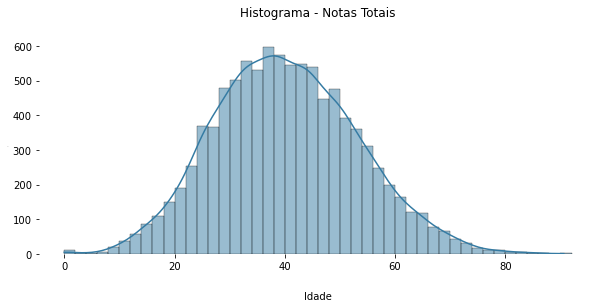

In [45]:
# Histograma com kde

plt.figure(figsize=(10, 4))
sns.histplot(data = microdados_enade[col], binwidth=2, linewidth = 0.3, palette = 'mako', kde = True)

sns.despine(bottom=True, left=True)
plt.title('Histograma - Notas Totais', pad = 20)
plt.xlabel('Idade', labelpad=20)
plt.ylabel([],fontsize=0)
plt.legend([],[], frameon=False)


In [63]:
# Valores unicos da coluna QE_I01

lista = []

for i in microdados_enade['QE_I01']:
    lista.append(i)
    
lista = list(set(lista))
lista

['Separado(a)', 'Solteiro(a)', 'Viúvo(a)', 'Outro', 'Casado(a)']

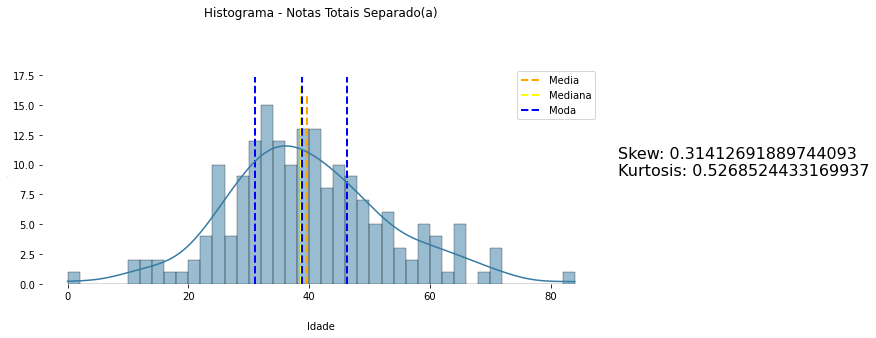

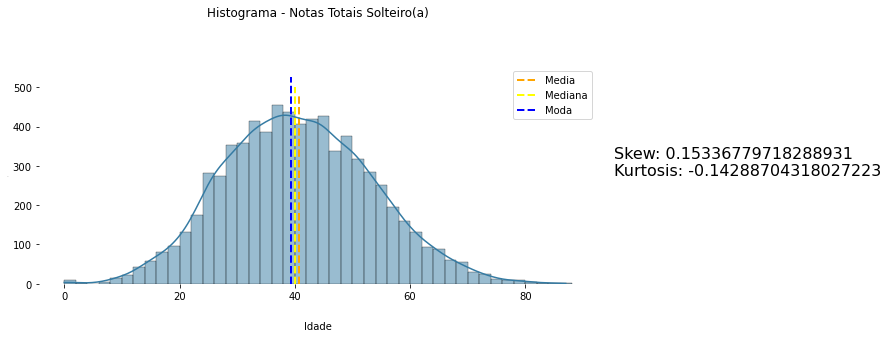

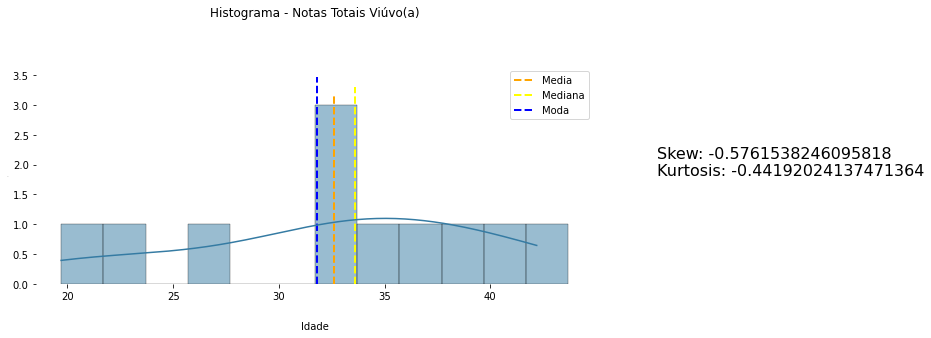

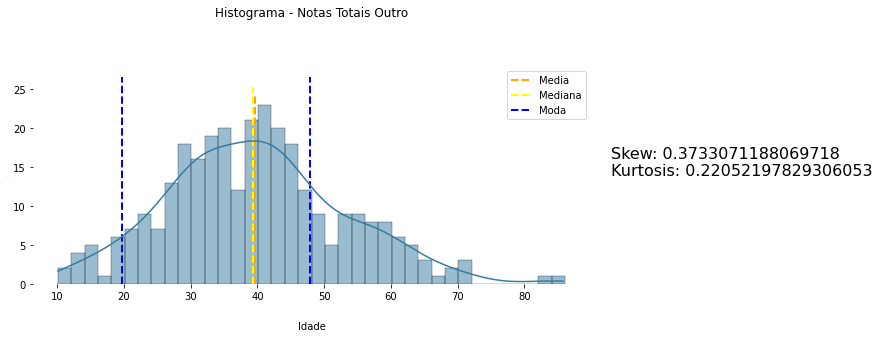

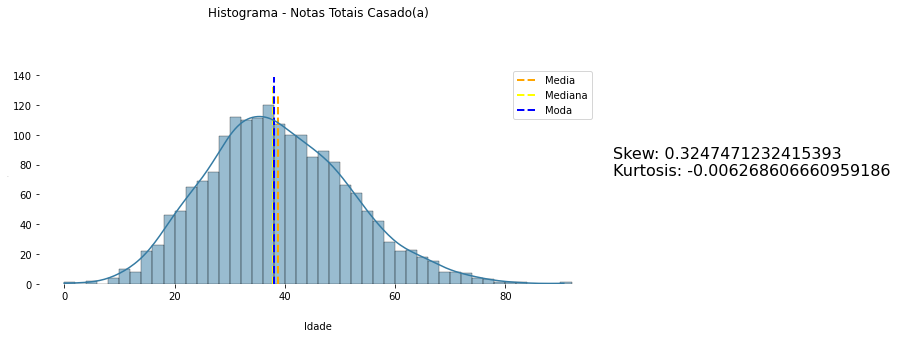

In [191]:
# Histograma com kde

for i in lista: 
    
    plt.figure(figsize=(10, 4))
    
    ax = sns.histplot(data = microdados_enade[col][microdados_enade['QE_I01'] == i], 
                 binwidth=2, 
                 linewidth = 0.3, 
                 palette = 'mako', 
                kde = True)
    
    plt.vlines(x = microdados_enade[col][microdados_enade['QE_I01'] == i].mean(),
          linewidth = 2, color = 'orange',
          ymin = 0, 
               ymax = ax.get_ylim()[1],
          label = 'Media',
          linestyle = '--')

    plt.vlines(x = microdados_enade[col][microdados_enade['QE_I01'] == i].median(),
              linewidth = 2, color = 'yellow',
              ymin = 0, 
               ymax =  ax.get_ylim()[1],
              label = 'Mediana',
              linestyle = '--')
    
    plt.vlines(x = microdados_enade[col][microdados_enade['QE_I01'] == i].mode()['NT_GER'],
              linewidth = 2, color = 'blue',
              ymin = 0, 
               ymax = ax.get_ylim()[1],
              label = 'Moda',
              linestyle = '--')
    


    sns.despine(bottom=True, left=True)
    plt.title('Histograma - Notas Totais {}'.format(i), pad = 50)
    plt.xlabel('Idade', labelpad=20)
    plt.ylabel([],fontsize=0)
    plt.legend()
    
    plt.text(ax.get_xlim()[1]+3, ax.get_ylim()[1]/2,
         'Skew: {} \nKurtosis: {}'.format(microdados_enade[col][microdados_enade['QE_I01'] == i].skew()[0],
                                                                microdados_enade[col][microdados_enade['QE_I01'] == i].kurtosis()[0]),
            fontsize = 16)